## 色彩平衡

In [1]:
import cv2

In [40]:
# 读取图像 读入以后是一个numpy.ndarray
img = cv2.imread("img/1.jpg")
# 显示图片
cv2.imshow("image",img)
# 等待
cv2.waitKey(0)
# 关闭所有窗口
cv2.destroyAllWindows()

In [23]:
# 基本点算子 进行增益和偏差变化 需要保证的是在0-255之间
a = 1
b = 10
img2= img +b
# 显示图片
cv2.imshow("image2",img2)
# 等待
cv2.waitKey(0)
# 关闭所有窗口
cv2.destroyAllWindows()

In [25]:
# 观察伽马矫正
img3 = img ** (-2.2)
# 显示图片
cv2.imshow("image3",img3)
# 等待
cv2.waitKey(0)
# 关闭所有窗口
cv2.destroyAllWindows()

## 直方图均衡化

In [46]:
# 直方图均衡化 直接分离三通道
def equalize_hist_color(img):
    # 使用 cv2.split() 分割 BGR 图像 改为三通道
    channels = cv2.split(img)
    eq_channels = []
    # 将 cv2.equalizeHist() 函数应用于每个通道
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    # 使用 cv2.merge() 合并所有结果通道
    eq_image = cv2.merge(eq_channels)
    return eq_image

image_eq = equalize_hist_color(img)

# 显示图片
cv2.imshow("image_eq",image_eq)
# 等待
cv2.waitKey(0)
# 关闭所有窗口
cv2.destroyAllWindows()

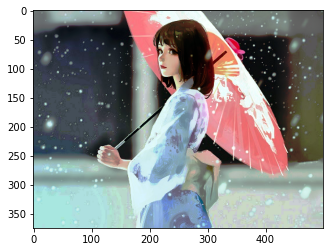

In [52]:
import matplotlib.pyplot as plt

# plt.figure('image')
# 需要反转bgr->RGB
plt.imshow(image_eq[:,:,::-1]) 
plt.show()

# 几何变换
1. 图像缩放 对图像进行放大和缩小
2. 图像平移 需要指定平移矩阵
3. 图像旋转 指定中心点和旋转角度
4. 仿射变换 长度和线之间的角度发生了变换 主要用在图像的预处理
5. 透射变换 根据对应点找到透射变换矩阵
6. 金字塔 涉及上采样和下采样

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img1 = cv.imread('img/1.jpg')

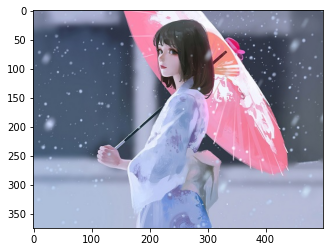

In [8]:
plt.imshow(img1[:,:,::-1])

In [9]:
# 查看原来的大小

In [10]:
rows, cols = img1.shape[:2]

In [11]:
rows

375

In [12]:
cols

500

In [32]:
# 进行缩放 参数先是宽 再是高
img2 = cv.resize(img1,(2*cols,2*rows))
img3 = cv.resize(img1,None,fx=0.5,fy=0.5)

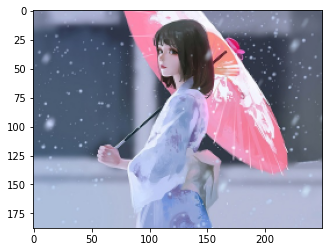

In [33]:
plt.imshow(img2[:,:,::-1])
plt.imshow(img3[:,:,::-1])

In [34]:
img3.shape

(188, 250, 3)

## 图像平移

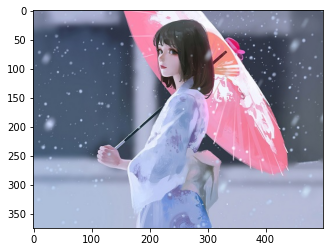

In [37]:
plt.imshow(img1[:,:,::-1])

In [46]:
# 创建平移矩阵
M = np.float32([[1,0,100],[0,1,50]])

In [47]:
img4 = cv.warpAffine(img1,M,(2*cols,2*rows))

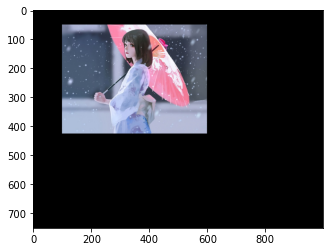

In [48]:
plt.imshow(img4[:,:,::-1])

## 图像旋转

In [53]:
# 得到旋转矩阵 参数：旋转中心，旋转角度，缩放比例
M = cv.getRotationMatrix2D((cols/2,rows/2),45,1)

In [54]:
img5 = cv.warpAffine(img1,M,(cols,rows))

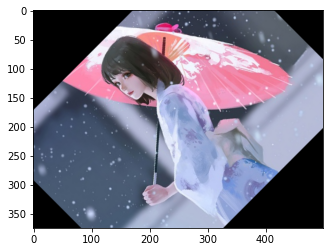

In [55]:
plt.imshow(img5[:,:,::-1])

## 仿射变换

点线的关系保持不变，但是线和线之间的角度和线的长度会发生变换

In [57]:
# 指定原始图像中像素点的位置
pts1 = np.float32([[50,50],[200,50],[50,200]])
# 仿射变换以后对应点的位置
pts2 = np.float32([[100,100],[200,50],[100,250]])

In [59]:
# 得到仿射变换矩阵
M = cv.getAffineTransform(pts1,pts2)

In [60]:
M

array([[ 0.66666667,  0.        , 66.66666667],
       [-0.33333333,  1.        , 66.66666667]])

In [61]:
img6 = cv.warpAffine(img1,M,(cols,rows))

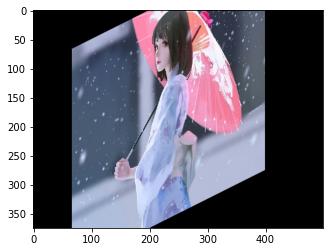

In [62]:
plt.imshow(img6[:,:,::-1])

## 透射变换
视角变换的结果
本质是将图像投影到一个新的平面

In [64]:
# 首先根据四个点找到透射变换的矩阵（目标矩阵有八个未知数）
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[100,145],[300,100],[80,290],[310,300]])
T = cv.getPerspectiveTransform(pts1,pts2)

In [65]:
T

array([[ 3.98327670e-01, -2.09876559e-02,  7.49460064e+01],
       [-1.92233080e-01,  4.29335771e-01,  1.21896057e+02],
       [-7.18774228e-04, -1.33393850e-05,  1.00000000e+00]])

In [66]:
img6 = cv.warpPerspective(img1,T,(cols,rows))

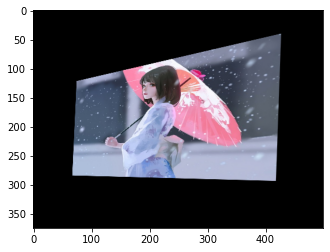

In [67]:
plt.imshow(img6[:,:,::-1])

## 图像金字塔
作为图像多尺度表达的一种，主要用于图像分割，是一种以多分辨率来解释图像的有效但是概念简单的结构
主要用于机器视觉和图像压缩

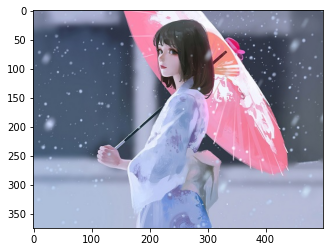

In [69]:
plt.imshow(img1[:,:,::-1])

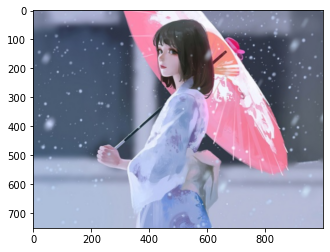

In [70]:
# 上采样
imgup = cv.pyrUp(img1)
plt.imshow(imgup[:,:,::-1])

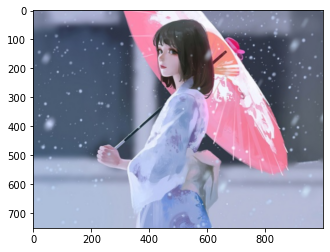

In [73]:
# 下采样
imgdown = cv.pyrUp(img1)
plt.imshow(imgdown[:,:,::-1])

# 形态学操作

腐蚀 膨胀 开闭运算 礼帽 黑帽

1. 连通性

    四邻域、D邻域、八邻域（都是指的像素）

    连通性的必要条件：1. 两个位置相邻2. 两个像素的灰度值满足特定的相似性准则

2. 腐蚀和膨胀

3. 开闭运算

4. 礼帽和黑帽



## 腐蚀和膨胀

In [74]:
# 腐蚀 求局部最小操作 作用：消除物体的边界点 目标缩小，消除小于结构元素的噪声点
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

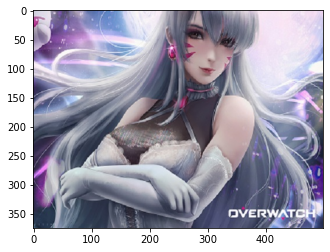

In [75]:
img = cv.imread('img/2.jpg')
plt.imshow(img[:,:,::-1])

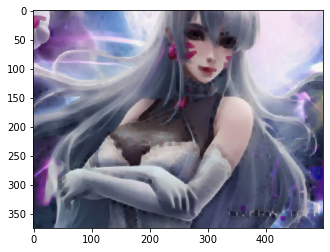

In [77]:
# 创建核结构
kenel = np.ones((5,5),np.uint8)
# 腐蚀
img2 = cv.erode(img,kenel)
plt.imshow(img2[:,:,::-1])

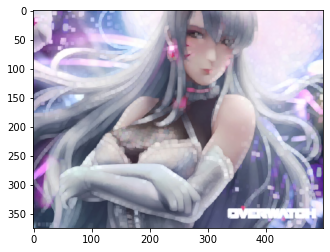

In [78]:
# 膨胀
img3 = cv.dilate(img,kenel)
plt.imshow(img3[:,:,::-1])

## 开闭运算
- 开运算：先腐蚀后膨胀 ：可以分离物体，消除小区域，消除噪点 去除小的干扰块

- 闭运算：先膨胀后腐蚀 ：消除闭合区域中的孔洞


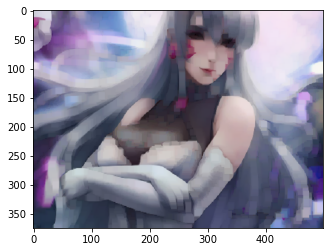

In [79]:
# 开运算
kenel = np.ones((10,10),np.uint8)
cvopen = cv.morphologyEx(img,cv.MORPH_OPEN,kenel)
plt.imshow(cvopen[:,:,::-1])

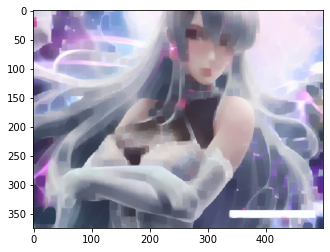

In [80]:
# 闭运算
kenel = np.ones((10,10),np.uint8)
cvclose = cv.morphologyEx(img,cv.MORPH_CLOSE,kenel)
plt.imshow(cvclose[:,:,::-1])

## 礼帽、黑帽运算

- 礼帽运算用来分离比邻近点亮一些的斑块

- 黑帽帽运算用来分离比邻近点暗一些的斑块

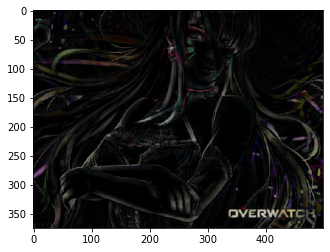

In [84]:
# 原图像- 开运算
kenel = np.ones((10,10),np.uint8)
cvopen = cv.morphologyEx(img,cv.MORPH_TOPHAT,kenel)
plt.imshow(cvopen[:,:,::-1])

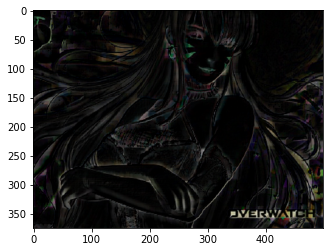

In [85]:
# 原图像- 闭运算
kenel = np.ones((10,10),np.uint8)
cvclose = cv.morphologyEx(img,cv.MORPH_BLACKHAT,kenel)
plt.imshow(cvclose[:,:,::-1])

# 图像平滑

## 图像噪声

- 椒盐噪声

    随机出现的白点或者黑点

- 高斯噪声

    噪声的密度函数服从高斯分布

## 图像平滑

- 通过低通滤波去除噪声

- 均值滤波 对区域内求均值 算法简单  计算速度快 但是图像会变得模糊

- 高斯滤波 周围像素满足正态分布(周围点的加权和)

- 中值滤波 非线性滤波技术 基本思想是利用像素点周围邻域灰度值的中值来代替该像素的灰度值，对椒噪声最有用

In [101]:
# 均值滤波
dogsp = cv.imread('image/dogsp.jpeg')

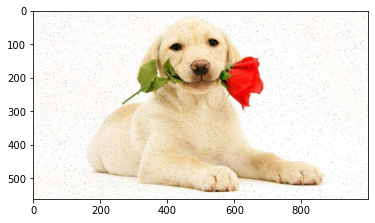

In [102]:
plt.imshow(dogsp[:,:,::-1])

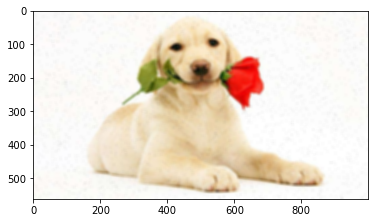

In [103]:
# 均值滤波
dog = cv.blur(dogsp,(10,10))
plt.imshow(dog[:,:,::-1])

In [104]:
# 高斯滤波
doggs = cv.imread('image/dogGauss.jpeg')

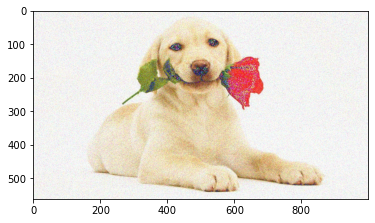

In [97]:
plt.imshow(doggs[:,:,::-1])

In [98]:
dog = cv.GaussianBlur(doggs,(3,3),1)

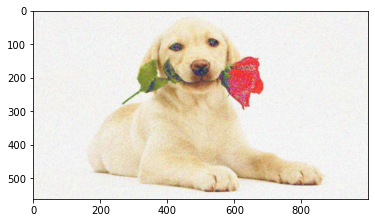

In [100]:
plt.imshow(dog[:,:,::-1])

In [107]:
# 中值滤波
blur = cv.medianBlur(dogsp,5)

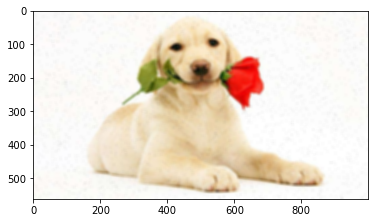

In [108]:
plt.imshow(dog[:,:,::-1])

# 直方图

- 图像直方图用来表示数字图像中的亮度分布的直方图 统计的是每一个强度值像素的个数

- 不同的图像的直方图可能是相同的

In [118]:
img = cv.imread('img/1.jpg',0)

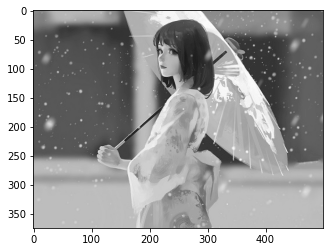

In [119]:
# 灰度图显示
plt.imshow(img,cmap=plt.cm.gray)

In [124]:
# 计算直方图
hist = cv.calcHist( [img],[0],None,[255],[0,255])

<function matplotlib.pyplot.show(close=None, block=None)>

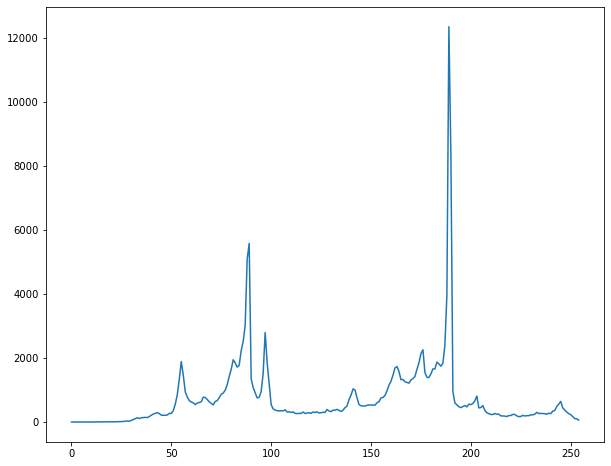

In [125]:
plt.figure(figsize=(10,8))
plt.plot(hist)
plt.show

## 掩膜  
 
 - 通常使用二维矩阵进行掩膜 用0和1组成的二进制图像 1表示需要处理0则进行屏蔽

 作用：

    1. 提取感兴趣的区域

    2. 屏蔽作用

    3. 结构特征提取

    4. 特殊形状图像制作

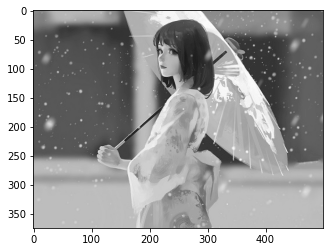

In [126]:
# 原始的灰度图显示
plt.imshow(img,cmap=plt.cm.gray)

In [129]:
# 创建掩膜
mask = np.zeros(img.shape[:2],np.uint8)
mask[30:150,200:300] = 1

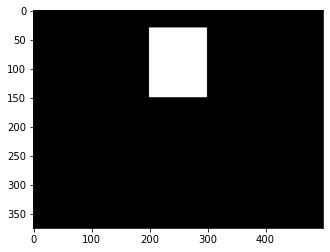

In [130]:
plt.imshow(mask,cmap = plt.cm.gray)

In [131]:
# 进行与操作
mask_img = cv.bitwise_and(img,img,mask=mask)

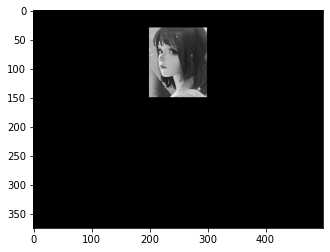

In [132]:
plt.imshow(mask_img,cmap = plt.cm.gray)

In [135]:
# 绘制直方图
hist = cv.calcHist( [img],[0],mask,[255],[0,255])

<function matplotlib.pyplot.show(close=None, block=None)>

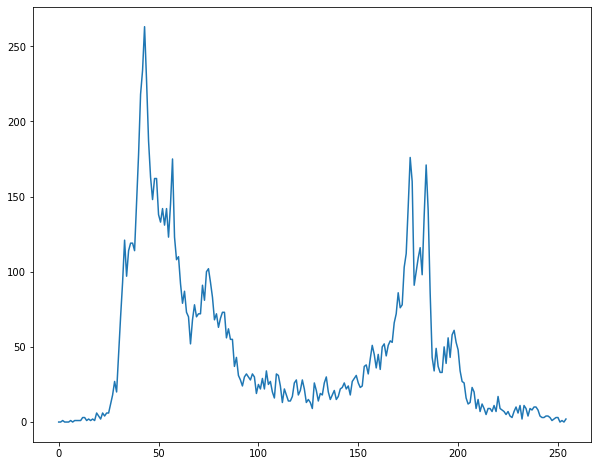

In [136]:
plt.figure(figsize=(10,8))
plt.plot(hist)
plt.show

## 直方图均衡化

- 提高整体的对比度

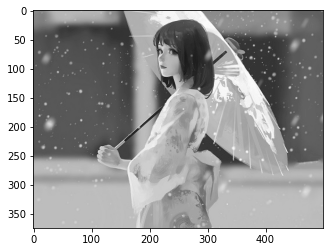

In [137]:
# 原始的灰度图显示
plt.imshow(img,cmap=plt.cm.gray)

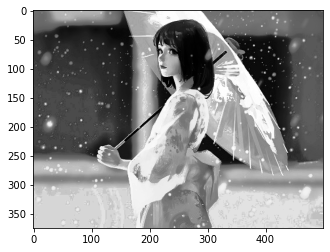

In [140]:
# 直方图均衡化
dst = cv.equalizeHist(img)
plt.imshow(dst,cmap=plt.cm.gray)

### 自适应的直方图均衡化

- 

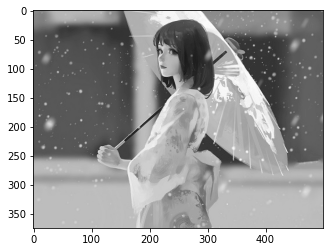

In [141]:
# 原始的灰度图显示
plt.imshow(img,cmap=plt.cm.gray)

In [144]:
# 先初始化一个对象
c1 = cv.createCLAHE(2.0,(8,8))
clahe = c1.apply(img)

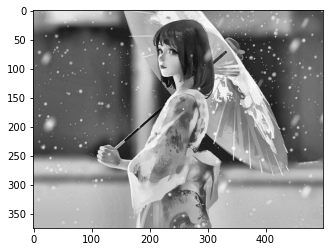

In [145]:
# 原始的灰度图显示
plt.imshow(clahe,cmap=plt.cm.gray)

# 边缘检测

- 目的：标识数字图像中亮度变化明显的点

- 基于搜索：寻找图像一阶导数中的最大值

- 基于零穿越 ：二阶导数过零点：代表  拉普拉斯算子

Sobel检测算子：基于一阶导数,基于搜索的方法

Scharr算法 和Sobel相比只是核的值不一样

- 实现：主要是进行求导  不同的算子使用的卷积核不一样

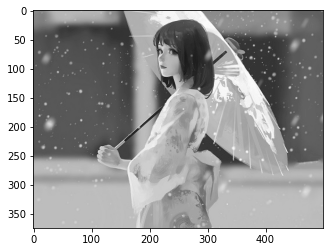

In [146]:
# 原始的灰度图显示
plt.imshow(img,cmap=plt.cm.gray)

In [148]:
# Sobel检测算子

# 分别沿两个方向求导
x = cv.Sobel(img,cv.CV_16S,1,0)
y = cv.Sobel(img,cv.CV_16S,0,1)

absx = cv.convertScaleAbs(x)
absy = cv.convertScaleAbs(y)

res = cv.addWeighted(absx,0.5,absy,0.5,0)



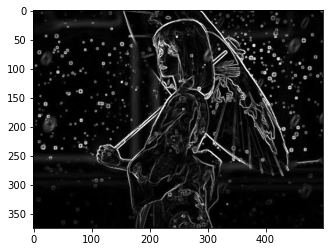

In [149]:
# 原始的灰度图显示
plt.imshow(res,cmap=plt.cm.gray)

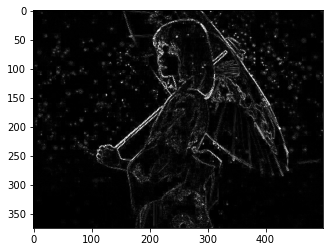

In [151]:
# laplacian 算子进行边缘检测

res = cv.Laplacian(img,cv.CV_16S)

res = cv.convertScaleAbs(res)
plt.imshow(res,cmap=plt.cm.gray)

### CAnny边缘检测

1. 噪声去除 高斯滤波

2. 计算图像梯度 sobel算子

3. 非极大值抑制 判断是不是边界点

4. 滞后阈值 确定最终边界


In [154]:
res = cv.Canny(img,0,100)

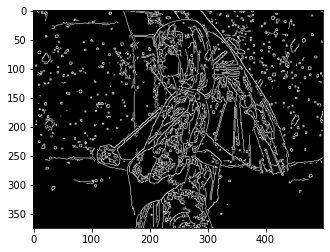

In [155]:
plt.imshow(res,cmap=plt.cm.gray)

# 模板匹配和霍夫变换

## 模板匹配

- 模板匹配不适用尺度的变换 

- 尺度变换、视角变换以后的图像需要使用关键点匹配算法 如：SIFT、SURF算法

## 霍夫变换

- 提取集合图形  原理：将需要检测的内容转换到霍夫空间中，利用累加器统计最优解 将检测结果表示处理

- 对于直线：x-y坐标-> 霍夫空间中的一个点 

- 主要是进行坐标的变换

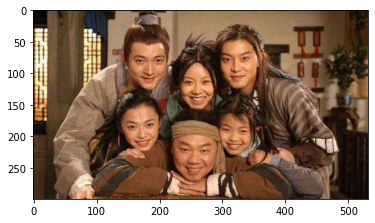

In [156]:
# 进行模板匹配
img = cv.imread('image/wulin.jpeg')
plt.imshow(img[:,:,::-1])

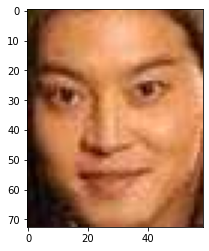

In [157]:
tem = cv.imread('image/bai.jpeg')
plt.imshow(tem[:,:,::-1])

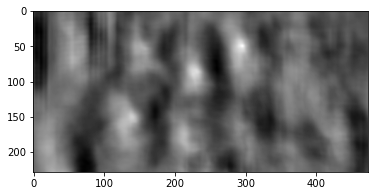

In [160]:
res = cv.matchTemplate(img,tem,cv.TM_CCOEFF)
plt.imshow(res,cmap=plt.cm.gray)

In [161]:
min_val,max_val,min_loc,max_loc = cv.minMaxLoc(res)

In [166]:
top_left = max_loc
h,w = tem.shape[:2]
bottom_right = (top_left[0]+w,top_left[1]+h)

In [167]:
# 画个框
cv.rectangle(img,top_left,bottom_right,(0,255,0),2)

array([[[ 4,  9,  7],
        [ 4,  9,  7],
        [ 4,  9,  7],
        ...,
        [ 9, 18, 32],
        [11, 20, 34],
        [13, 22, 36]],

       [[ 4,  9,  7],
        [ 4,  9,  7],
        [ 4,  9,  7],
        ...,
        [ 6, 15, 28],
        [ 8, 17, 31],
        [10, 19, 32]],

       [[ 4,  9,  8],
        [ 4,  9,  8],
        [ 4,  9,  8],
        ...,
        [ 5, 14, 24],
        [ 7, 15, 28],
        [ 9, 18, 28]],

       ...,

       [[16, 33, 54],
        [25, 42, 63],
        [30, 47, 68],
        ...,
        [ 6,  9, 17],
        [ 5,  8, 16],
        [ 3,  6, 14]],

       [[16, 33, 54],
        [25, 42, 63],
        [30, 47, 68],
        ...,
        [ 6,  9, 17],
        [ 5,  8, 16],
        [ 3,  6, 14]],

       [[16, 33, 54],
        [25, 42, 63],
        [30, 47, 68],
        ...,
        [ 6,  9, 17],
        [ 5,  8, 16],
        [ 3,  6, 14]]], dtype=uint8)

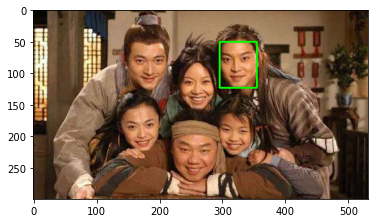

In [168]:
plt.imshow(img[:,:,::-1])

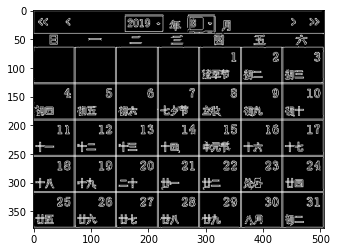

In [186]:
# 霍夫线检测

img = cv.imread('image/rili.jpg')
# 边缘检测
edges = cv.Canny(img,50,150)
plt.imshow(edges,cmap=plt.cm.gray)

In [187]:
# 检测直线
lines = cv.HoughLines(edges,0.8,np.pi/180,150)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho*a
    y0 = rho*b
    x1 = int(x0+1000*(-b))
    y1 = int(y0+100*a)
    x2 = int(x0-1000*(-b))
    y2 = int(y0-1000*a)
    cv.line(img,(x1,y1),(x2,y2),(0,255,0))
    


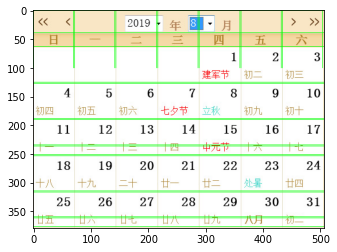

In [188]:
plt.imshow(img[:,:,::-1])